In [3]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
#importing datasets
train = pd.read_csv(r'D:\Internship\walmart\train.csv')
test = pd.read_csv(r'D:\Internship\walmart\test.csv')
features = pd.read_csv(r'D:\Internship\walmart\features.csv')
stores = pd.read_csv(r'D:\Internship\walmart\stores.csv')

In [5]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [6]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [7]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [8]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [9]:
#Converting categorical values to numeric values 
mapping_store_type = {'Type': {'A':1, 'B':2, 'C':3}}
stores.replace(mapping_store_type, inplace = True)

In [10]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
#Creating dummy variables
dummy_var = pd.get_dummies(stores.Type)
stores = pd.concat([stores, dummy_var], axis=1)

In [12]:
stores.head()

,Store,Type,Size,1,2,3
0,1,1,151315,1,0,0
1,2,1,202307,1,0,0
2,3,2,37392,0,1,0
3,4,1,205863,1,0,0
4,5,2,34875,0,1,0


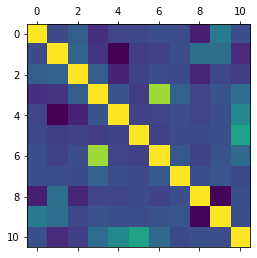

In [13]:
#Correalation plot
corr = features.corr()
plt.matshow(corr)
plt.show()

In [14]:
#Evaluating missing values
from statistics import mean
features['CPI'] = features['CPI'].transform(lambda x:x.fillna(x.mean()))
features['Unemployment'] = features['Unemployment'].transform(lambda x:x.fillna(x.mean()))
features = features.fillna(0)

In [15]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [16]:
#Merging datasets
train_stores = pd.merge(train, stores, how='left')
train_final_data = pd.merge(train_stores, features, how='left')
test_stores = pd.merge(test, stores, how='left')
test_final_data = pd.merge(test_stores, features, how='left')

In [17]:
#Changing IsHoliday categorical variable to numeric
train_final_data['IsHoliday'] = [int(i) for i in train_final_data['IsHoliday']]
test_final_data['IsHoliday'] = [int(i) for i in test_final_data['IsHoliday']]

In [18]:
#sorting final datasets
train_final_data = train_final_data.sort_values(by = 'Date')
test_final_data = test_final_data.sort_values(by = 'Date')

In [19]:
train_final_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,1,2,3,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,1,151315,1,0,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
277665,29,5,2010-02-05,15552.08,0,2,93638,0,1,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064
277808,29,6,2010-02-05,3200.22,0,2,93638,0,1,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064
277951,29,7,2010-02-05,10820.05,0,2,93638,0,1,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064
278094,29,8,2010-02-05,20055.64,0,2,93638,0,1,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064


In [20]:
test_final_data.head()

,Store,Dept,Date,IsHoliday,Type,Size,1,2,3,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,0,1,151315,1,0,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
48640,19,10,2012-11-02,0,1,203819,1,0,0,46.81,3.970,11686.96,18053.48,88.94,5484.50,3833.76,138.622710,7.992
42002,16,55,2012-11-02,0,2,57197,0,1,0,38.20,3.604,2826.02,984.41,4.46,274.18,1411.99,199.290867,5.847
57105,22,18,2012-11-02,0,2,119557,0,1,0,54.55,3.817,8793.36,10347.53,5.62,7350.89,801.32,142.661460,7.543
65138,25,16,2012-11-02,0,2,128107,0,1,0,40.83,3.787,12435.08,16493.02,55.19,1165.36,1144.39,216.156711,7.293


In [21]:
train_final_data.shape

(421570, 19)

In [22]:
test_final_data.shape

(115064, 18)

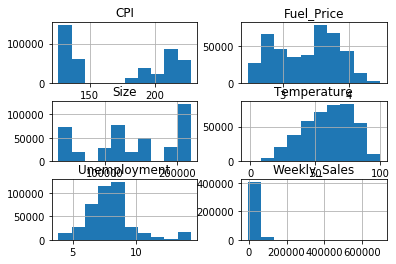

In [23]:
#Plotting data
viz = train_final_data[['Temperature', 'Fuel_Price', 'CPI', 'Weekly_Sales', 'Unemployment','Size']]
viz.hist()
plt.show()

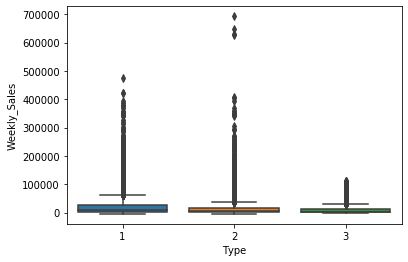

In [24]:
import seaborn as sns
from sklearn import *
sns.boxplot(x='Type', y='Weekly_Sales', data = train_final_data)

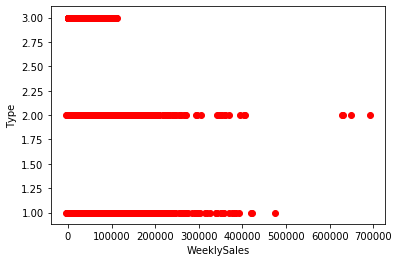

In [25]:
plt.scatter(train_final_data.Weekly_Sales, train_final_data.Type, color='red')
plt.ylabel('Type')
plt.xlabel('WeeklySales')
plt.show()

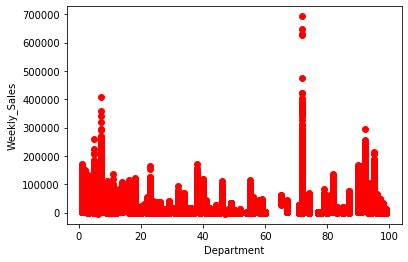

In [26]:
plt.scatter(train_final_data.Dept, train_final_data.Weekly_Sales, color='red')
plt.xlabel('Department')
plt.ylabel('Weekly_Sales')
plt.show()

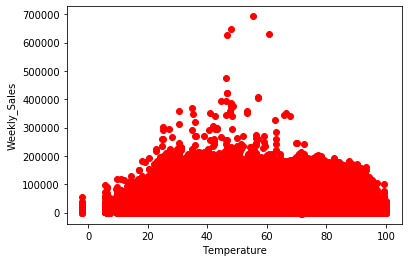

In [27]:
plt.scatter(train_final_data.Temperature, train_final_data.Weekly_Sales, color='red')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

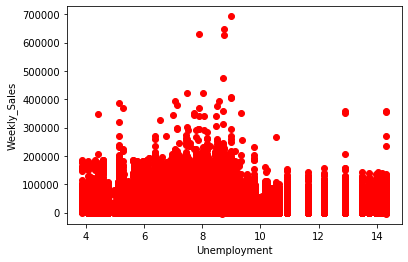

In [28]:
plt.scatter(train_final_data.Unemployment, train_final_data.Weekly_Sales, color='red')
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.show()

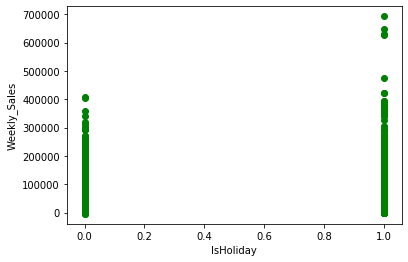

In [29]:
plt.scatter(train_final_data.IsHoliday, train_final_data.Weekly_Sales, color='green')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly_Sales')
plt.show()

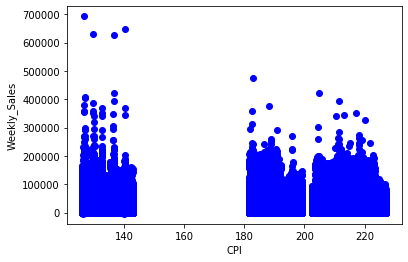

In [30]:
plt.scatter(train_final_data.CPI, train_final_data.Weekly_Sales, color='blue')
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()

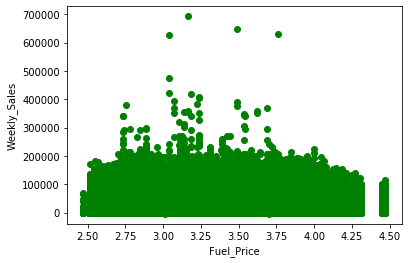

In [31]:
plt.scatter(train_final_data.Fuel_Price, train_final_data.Weekly_Sales, color='green')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.show()

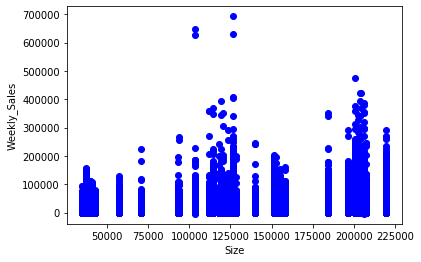

In [32]:
plt.scatter(train_final_data.Size, train_final_data.Weekly_Sales, color='blue')
plt.xlabel('Size')
plt.ylabel('Weekly_Sales')
plt.show()

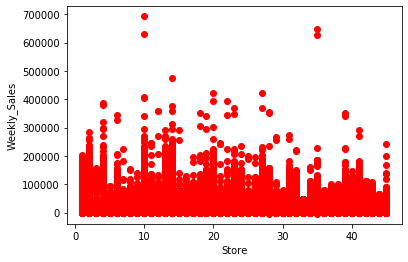

In [33]:
plt.scatter(train_final_data.Store, train_final_data.Weekly_Sales, color='red')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

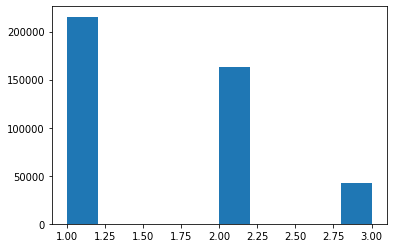

In [34]:
plt.hist(train_final_data['Type'])
plt.show()

In [35]:
# sns.countplot(x='IsHoliday', data=train_final_data)

In [36]:
# sns.heatmap(train_final_data.isnull(),yticklabels=False, cmap="viridis")

In [37]:
# sns.pairplot(train_final_data, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [38]:
# sns.pairplot(train_final_data, vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

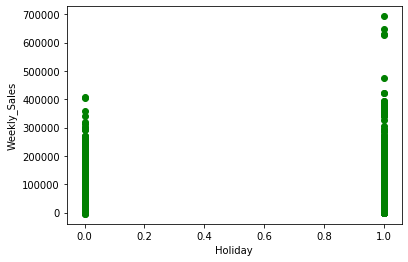

In [39]:
plt.scatter(train_final_data.IsHoliday, train_final_data.Weekly_Sales, color='green')
plt.xlabel('Holiday')
plt.ylabel('Weekly_Sales')
plt.show()

In [40]:
#dropping unwanted columns
train_final_data = train_final_data.drop(columns='Type')
test_final_data = test_final_data.drop(columns='Type')
train_final_data = train_final_data[train_final_data['Weekly_Sales']>=0]

In [41]:
# Adding extra features
train_final_data.Date = pd.to_datetime(train_final_data.Date)
test_final_data.Date = pd.to_datetime(test_final_data.Date)
# Add column for year
train_final_data["Year"] = pd.to_datetime(train_final_data["Date"], format="%Y-%m-%d").dt.year
test_final_data["Year"] = pd.to_datetime(test_final_data["Date"], format="%Y-%m-%d").dt.year
# Add column for day
train_final_data["Day"] = pd.to_datetime(train_final_data["Date"], format="%Y-%m-%d").dt.day
test_final_data["Day"] = pd.to_datetime(test_final_data["Date"], format="%Y-%m-%d").dt.day
# Add column for week
train_final_data["Week"] = pd.to_datetime(train_final_data["Date"], format="%Y-%m-%d").dt.week
test_final_data["Week"] = pd.to_datetime(test_final_data["Date"], format="%Y-%m-%d").dt.week

In [42]:
train_final_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,1,2,3,Temperature,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Day,Week
0,1,1,2010-02-05,24924.50,0,151315,1,0,0,42.31,...,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5,5
277665,29,5,2010-02-05,15552.08,0,93638,0,1,0,24.36,...,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,5,5
277808,29,6,2010-02-05,3200.22,0,93638,0,1,0,24.36,...,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,5,5
277951,29,7,2010-02-05,10820.05,0,93638,0,1,0,24.36,...,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,5,5
278094,29,8,2010-02-05,20055.64,0,93638,0,1,0,24.36,...,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,5,5


In [43]:
train_final_data.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Size,1,2,3,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Day,Week
count,420285.000000,420285.000000,420285.000000,420285.00000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773,0.07034,136749.569176,0.511541,0.387401,0.101058,60.090474,3.360888,2590.187246,878.803239,468.771234,1083.462694,1662.706138,171.212152,7.960077,2010.968443,15.673919,25.827729
std,12.787213,30.507197,22728.500149,0.25572,60992.688568,0.499867,0.487157,0.301405,18.448260,0.458523,6053.225499,5076.525234,5533.593113,3895.801513,4205.946641,39.162280,1.863873,0.796893,8.752825,14.152442
min,1.000000,1.000000,0.000000,0.00000,34875.000000,0.000000,0.000000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,11.000000,18.000000,2117.560000,0.00000,93638.000000,0.000000,0.000000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2010.000000,8.000000,14.000000
50%,22.000000,37.000000,7659.090000,0.00000,140167.000000,1.000000,0.000000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,2011.000000,16.000000,26.000000
75%,33.000000,74.000000,20268.380000,0.00000,202505.000000,1.000000,1.000000,0.000000,74.280000,3.738000,2801.500000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,2012.000000,23.000000,38.000000
max,45.000000,99.000000,693099.360000,1.00000,219622.000000,1.000000,1.000000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,31.000000,52.000000


In [44]:
train_final_data.shape

(420285, 21)

In [45]:
test_final_data.head()

,Store,Dept,Date,IsHoliday,Size,1,2,3,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Day,Week
0,1,1,2012-11-02,0,151315,1,0,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,2,44
48640,19,10,2012-11-02,0,203819,1,0,0,46.81,3.970,11686.96,18053.48,88.94,5484.50,3833.76,138.622710,7.992,2012,2,44
42002,16,55,2012-11-02,0,57197,0,1,0,38.20,3.604,2826.02,984.41,4.46,274.18,1411.99,199.290867,5.847,2012,2,44
57105,22,18,2012-11-02,0,119557,0,1,0,54.55,3.817,8793.36,10347.53,5.62,7350.89,801.32,142.661460,7.543,2012,2,44
65138,25,16,2012-11-02,0,128107,0,1,0,40.83,3.787,12435.08,16493.02,55.19,1165.36,1144.39,216.156711,7.293,2012,2,44


In [46]:
test_final_data.shape

(115064, 20)

In [47]:
features['IsHoliday'] = [int(i) for i in features['IsHoliday']]

In [61]:
#splitting data 
train_X = train_final_data.drop(['Weekly_Sales', 'Date'], axis = 1)
test_X = test_final_data.drop(['Date'], axis = 1)
train_y = train_final_data['Weekly_Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.25, random_state = 50)

In [49]:
train_X.shape, test_X.shape, train_y.shape

((420285, 19), (115064, 19), (420285,))

In [62]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

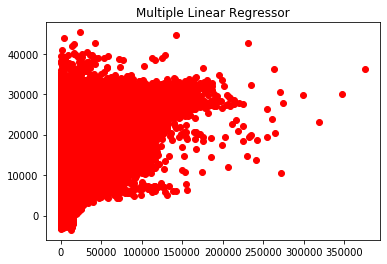

In [63]:
plt.scatter(y_test, y_pred, color='red')
plt.title('Multiple Linear Regressor')
plt.show()

In [64]:
from sklearn.metrics import accuracy_score
print(reg.score(X_test, y_test))

0.09154169926369238


In [79]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 17, n_jobs = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

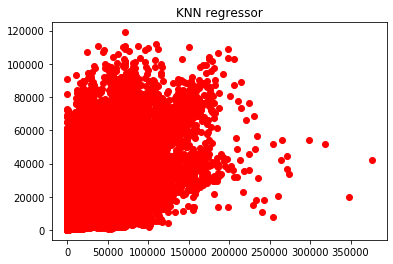

In [80]:
plt.scatter(y_test, y_pred, color='red')
plt.title('KNN regressor')
plt.show()

In [81]:
knn.score(X_test, y_test)

0.31709995875824826

In [74]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [75]:
reg.score(X_test, y_test)

0.9604466970048453